In [1]:
import datetime
from datetime import datetime

In [2]:
print("Last Updated:", str(datetime.today()))

Last Updated: 2025-02-13 02:57:50.024783


In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Simulating EEG Signals

In [4]:
# sampling rate (Hz)
fs = 250
# create a time vector
t = np.linspace(0,2, fs * 2)

In [5]:
# Simulating different brain waves
delta = np.sin(2 * np.pi * 2 * t)  # 2 Hz (delta)
theta = np.sin(2 * np.pi * 5 * t)  # 5 Hz (theta)
alpha = np.sin(2 * np.pi * 10 * t)  # 10 Hz (alpha)
beta = np.sin(2 * np.pi * 20 * t)  # 20 Hz (beta)

In [6]:
# Combine signals to mimic an EEG trace
eeg_signal = delta + beta + np.random.normal(0, 0.5, len(t))


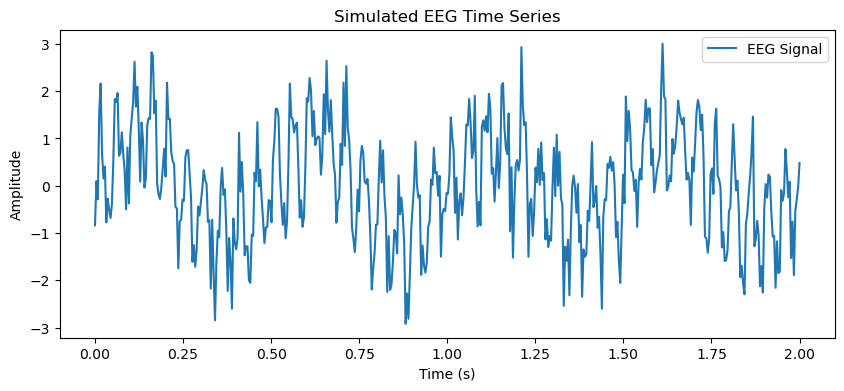

In [7]:
# Plot EEG time series
plt.figure(figsize=(10, 4))
plt.plot(t, eeg_signal, label="EEG Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Simulated EEG Time Series")
plt.legend()
plt.show()

## Plotting fMRI Templates

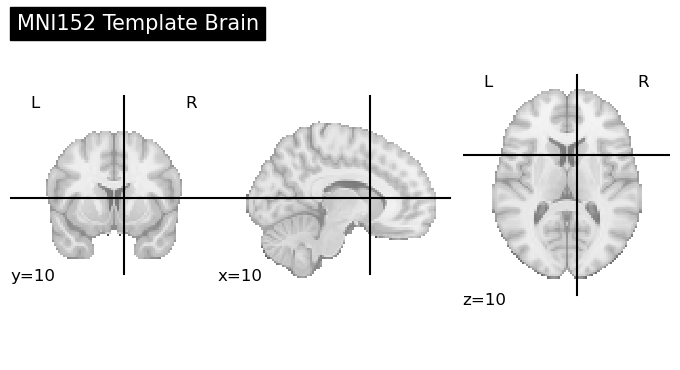

In [8]:
from nilearn import datasets, plotting

# Load an example fMRI dataset
#fmri_img = datasets.fetch("MNI152")  # MNI template brain

# Plot the anatomical brain scan (default is MNI 152)
plotting.plot_anat(title="MNI152 Template Brain", cut_coords=(10, 10, 10))
plotting.show()


## Inspecting the BOLD Signal

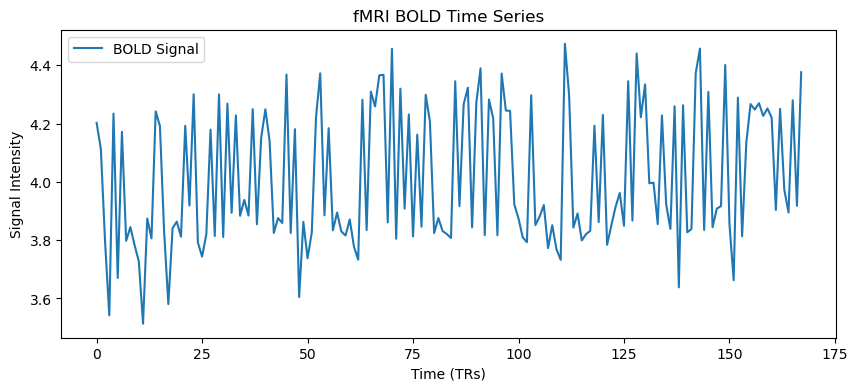

In [9]:
from nilearn import image
import numpy as np

# Load example fMRI image
fmri_img = datasets.fetch_development_fmri(n_subjects=1).func[0]

# Extract time series from a small brain region
roi_coords=(20, -30, 10)  # Select voxel at the center
roi_signal = image.smooth_img(fmri_img, 8).get_fdata()[roi_coords]

# Create time vector
time_points = np.arange(len(roi_signal))

# Plot the BOLD signal over time
plt.figure(figsize=(10, 4))
plt.plot(time_points, roi_signal, label="BOLD Signal")
plt.xlabel("Time (TRs)")
plt.ylabel("Signal Intensity")
plt.title("fMRI BOLD Time Series")
plt.legend()
plt.show()


## Simulated Techniques Resolution

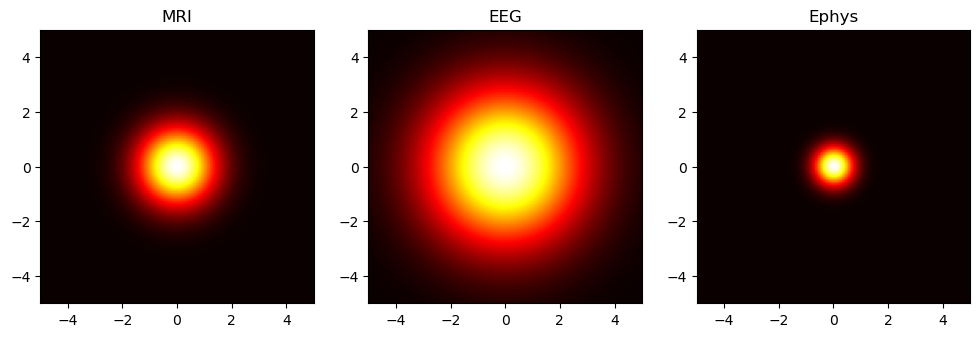

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Create 2D Gaussian blobs to represent resolution
x, y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))

# MRI (High spatial resolution)3
mri = np.exp(-((x ** 2 + y ** 2) / 2))

# EEG (Low spatial resolution, large spread)
eeg = np.exp(-((x ** 2 + y ** 2) / 8))

# Ephys (Very high spatial resolution, sharp peak)
ephys = np.exp(-((x ** 2 + y ** 2) / 0.5))

# Plot
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax, data, title in zip(axes, [mri, eeg, ephys], ["MRI", "EEG", "Ephys"]):
    ax.imshow(data, cmap="hot", extent=[-5, 5, -5, 5])
    ax.set_title(title)
plt.show()


## Accessing a Brain Atlas for Regions of Interest (ROIs)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets, input_data, plotting
from nilearn.connectome import ConnectivityMeasure
import networkx as nx

**Note**: add or remove the colon to suppress or show the output (you can also double click under the cell to hide the output)

In [12]:
# Step 1: Load a brain atlas and functional MRI data (Example dataset)
# Let's use a standard brain atlas (e.g., Harvard-Oxford Cortical and Sub-cortical)
atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr50-1mm')
atlas;

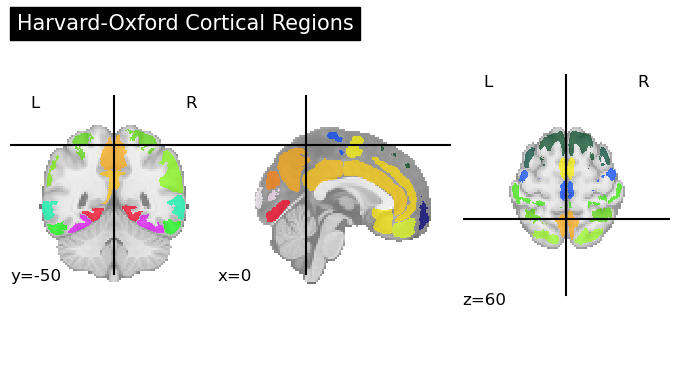

In [13]:
#labels = atlas.filename
plotting.plot_roi(atlas.filename, title='Harvard-Oxford Cortical Regions', cut_coords=(0,-50,60))
plotting.show()

In [14]:
# Fetch example resting state fMRI data for one person
# Example fMRI data from 'nilearn'
resting_state_data = datasets.fetch_development_fmri(n_subjects=1)
resting_state_data;

In [15]:
atlas = datasets.fetch_atlas_msdl()
# Loading atlas image stored in 'maps'
atlas_filename = atlas["maps"]
# Loading atlas data stored in 'labels'
labels = atlas["labels"]
labels;